In [1]:
import cv2
from pylab import *
import numpy as np
import math
import copy
def convol(image,kernal,size,color=1):
    if(color ==0):
        result = np.zeros((image.shape[0],image.shape[1],1), 'int16')
        for i in range(int(size/2),image.shape[0]-int(size/2)):
            for j in range(int(size/2),image.shape[1]-int(size/2)):
                for k in range(0,size):
                    for l in range(0,size):
                        result[i,j] += int(image[i+k-int(size/2),j+l-int(size/2)] * kernal[k][l])
    else:
        result = np.zeros((image.shape[0],image.shape[1],3), 'uint8')
        for i in range(int(size/2),image.shape[0]-int(size/2)):
            for j in range(int(size/2),image.shape[1]-int(size/2)):
                for k in range(0,size):
                    for l in range(0,size):
                        result[i,j,0] += int(image[i+k-int(size/2),j+l-int(size/2),0] * kernal[k][l])
                        result[i,j,1] += int(image[i+k-int(size/2),j+l-int(size/2),1] * kernal[k][l])
                        result[i,j,2] += int(image[i+k-int(size/2),j+l-int(size/2),2] * kernal[k][l])
    return result

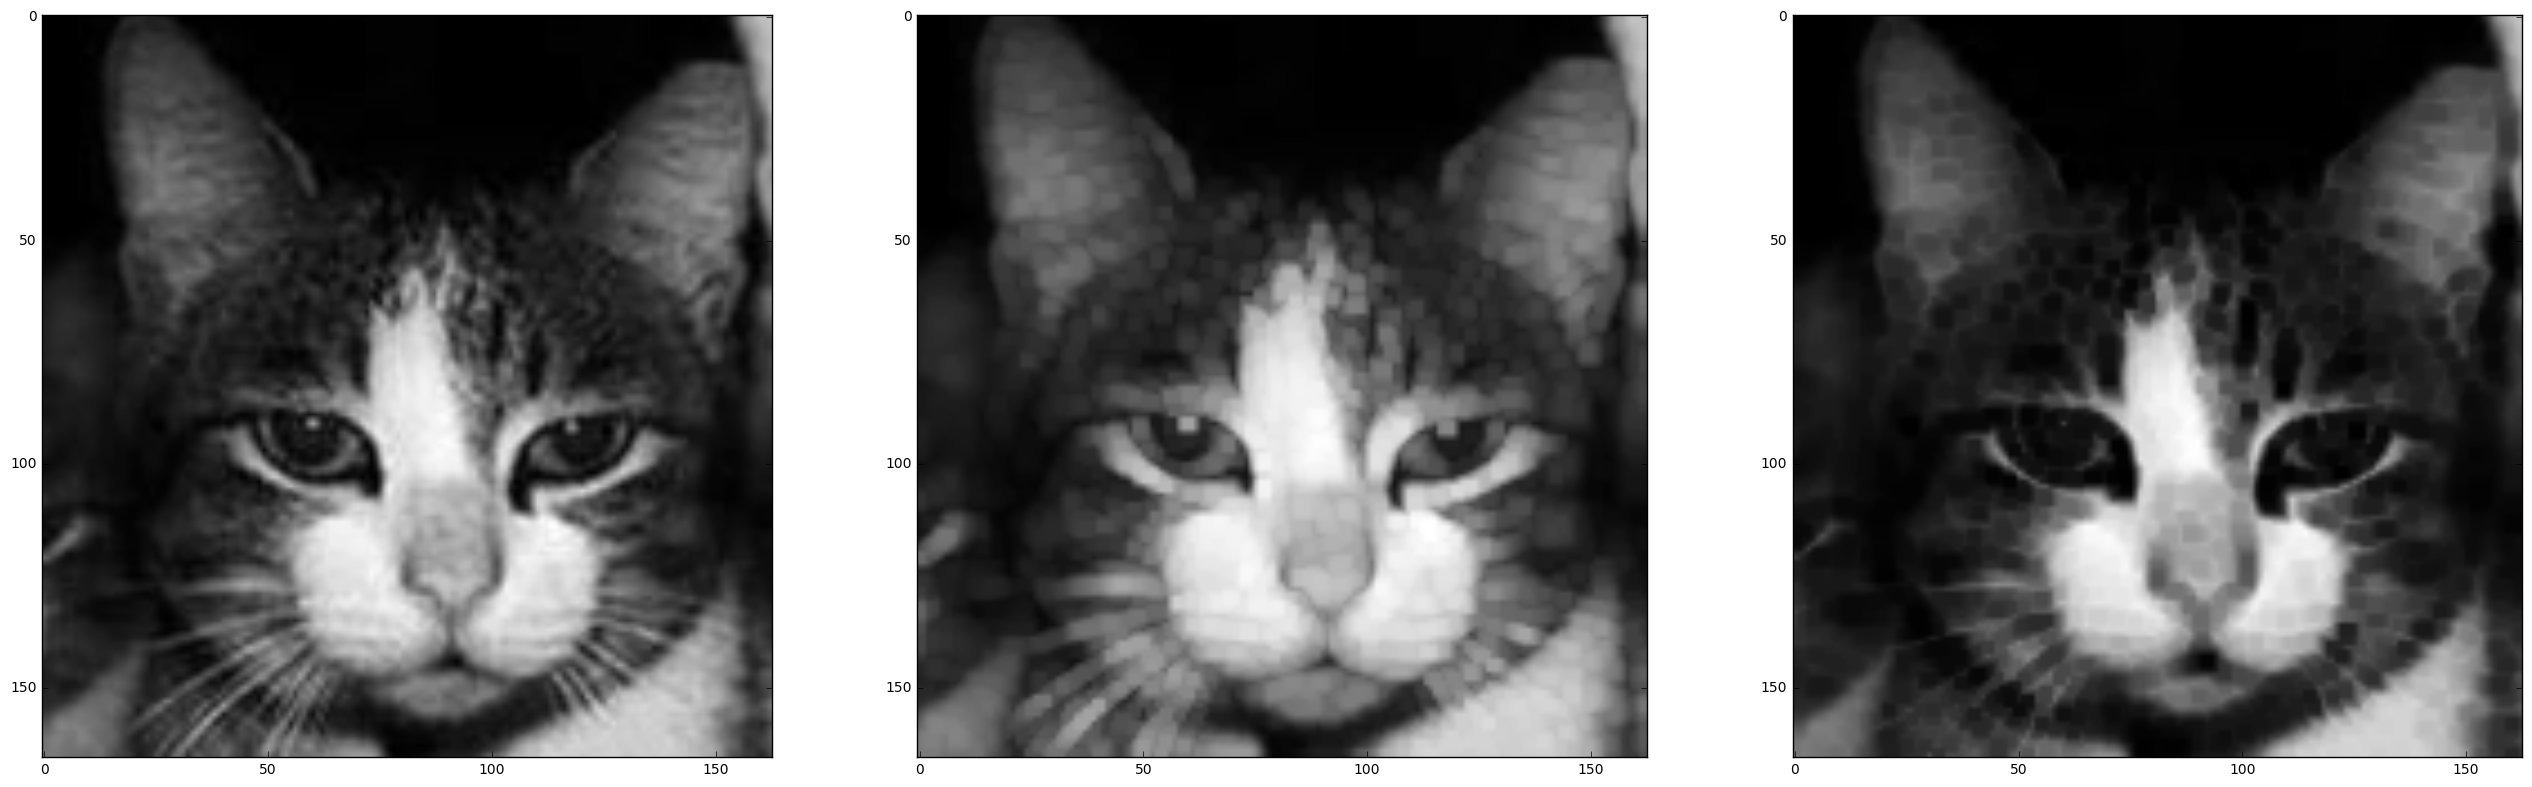

In [3]:
img = cv2.imread("image/cat1.jpg",0)
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(img,kernel,1)
erode = cv2.erode(img,kernel,1)
#np.zeros((img.shape[0],img.shape[1],3), 'uint8')

fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(dilate)
axs[1].axis('on')
axs[2].imshow(erode)
axs[2].axis('on')
gray()
show()

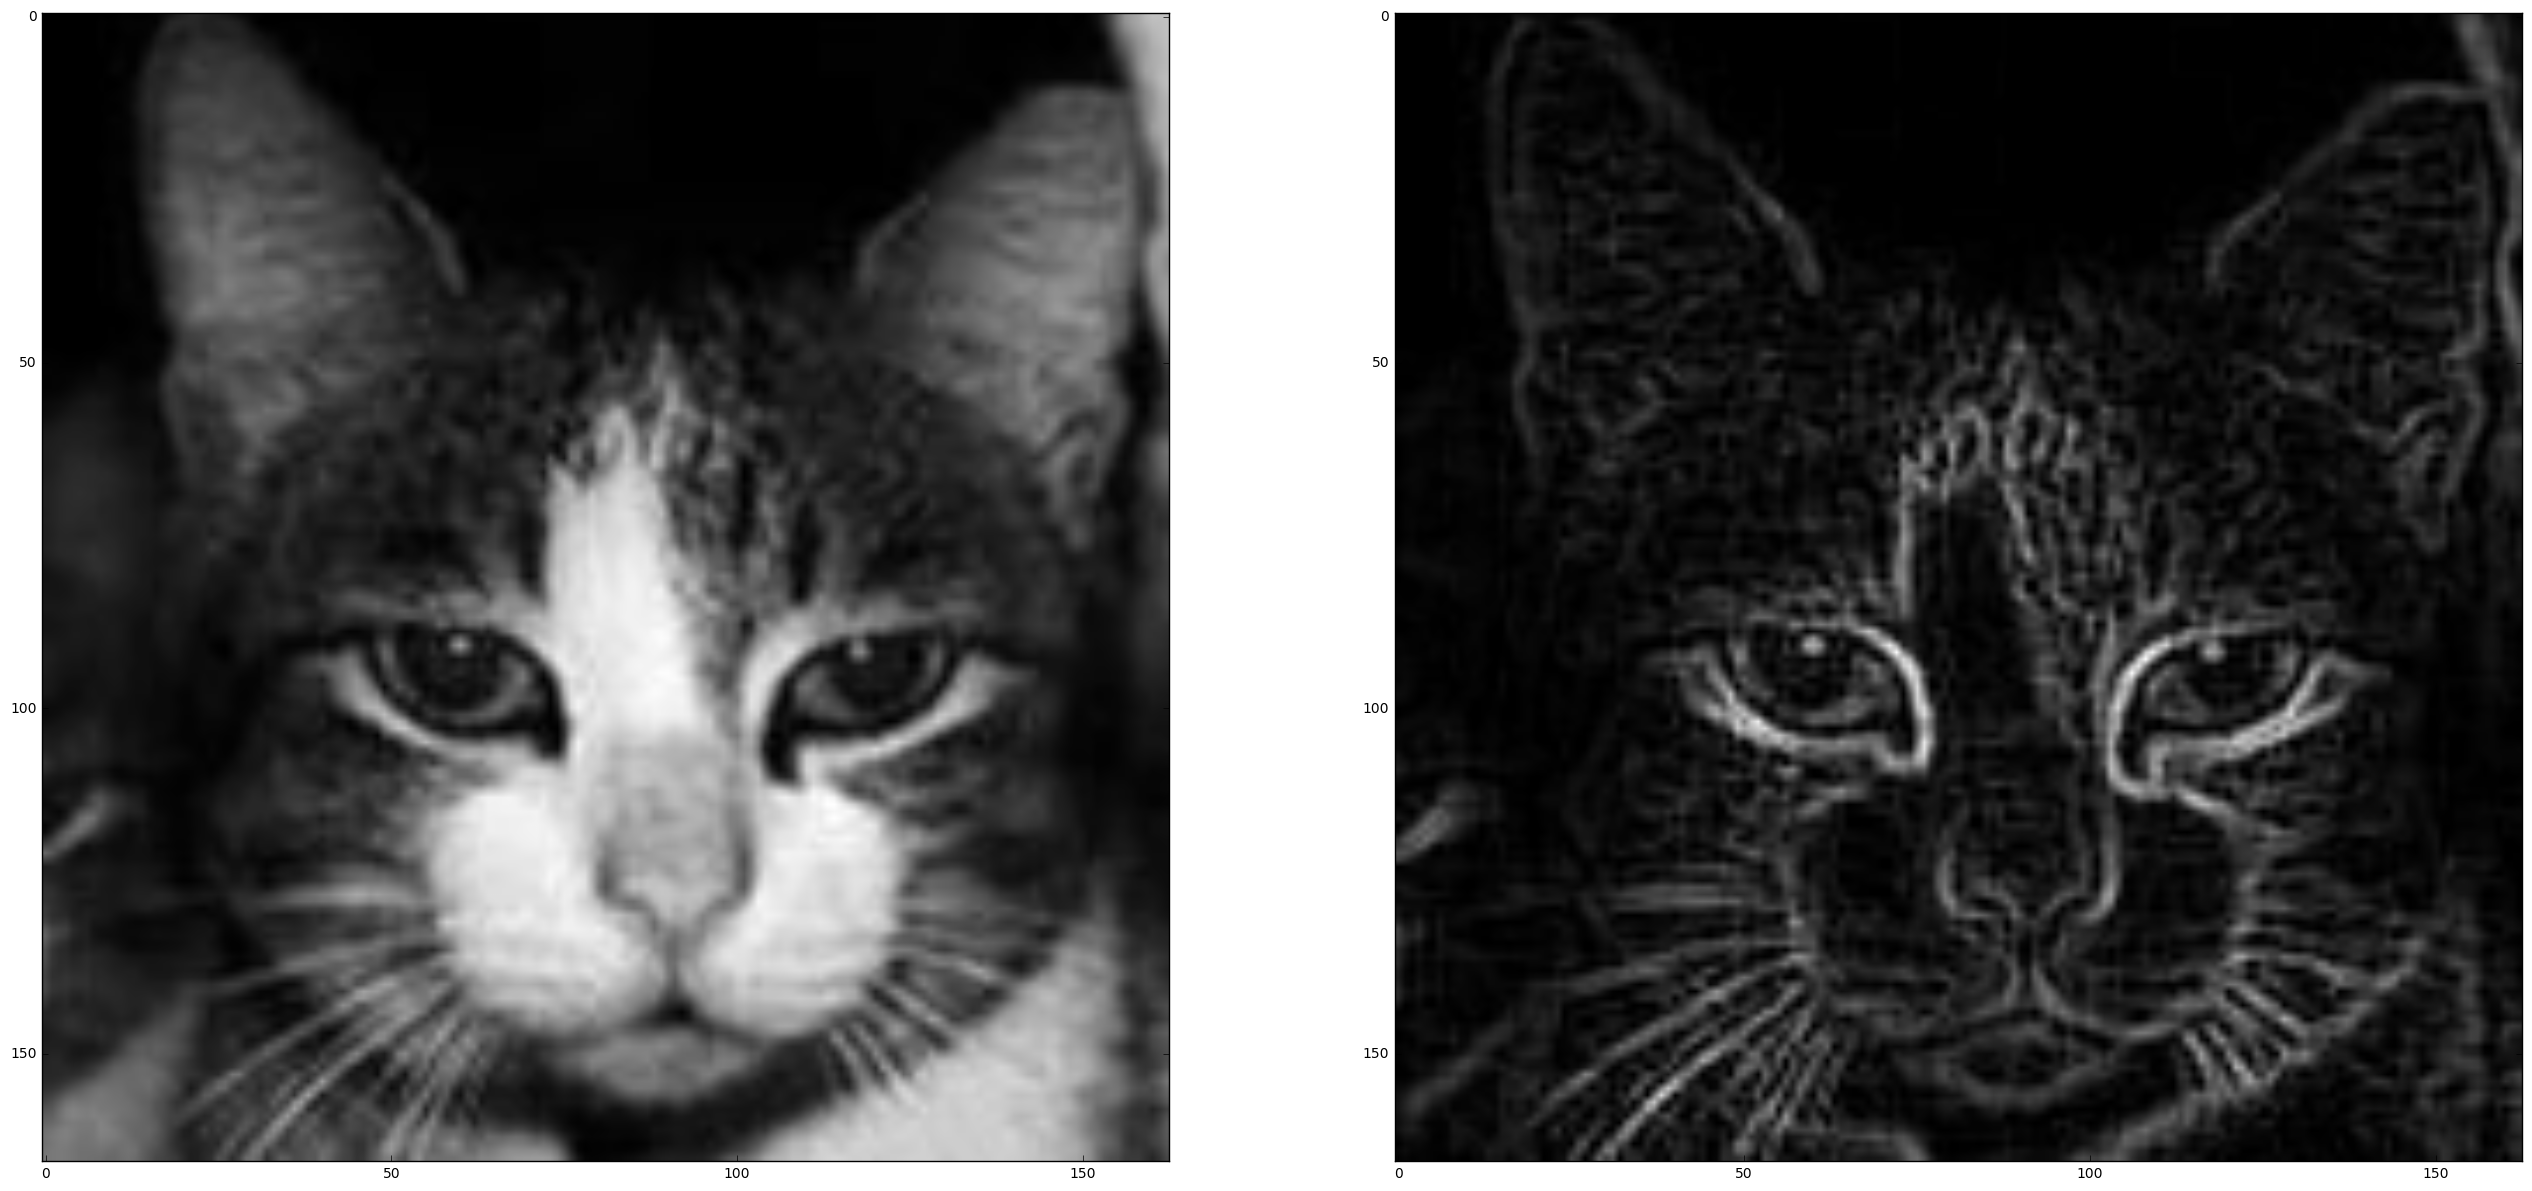

In [4]:
subimg = img -erode
fig, axs = subplots(1, 2, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(subimg)
axs[1].axis('on')
gray()
show()

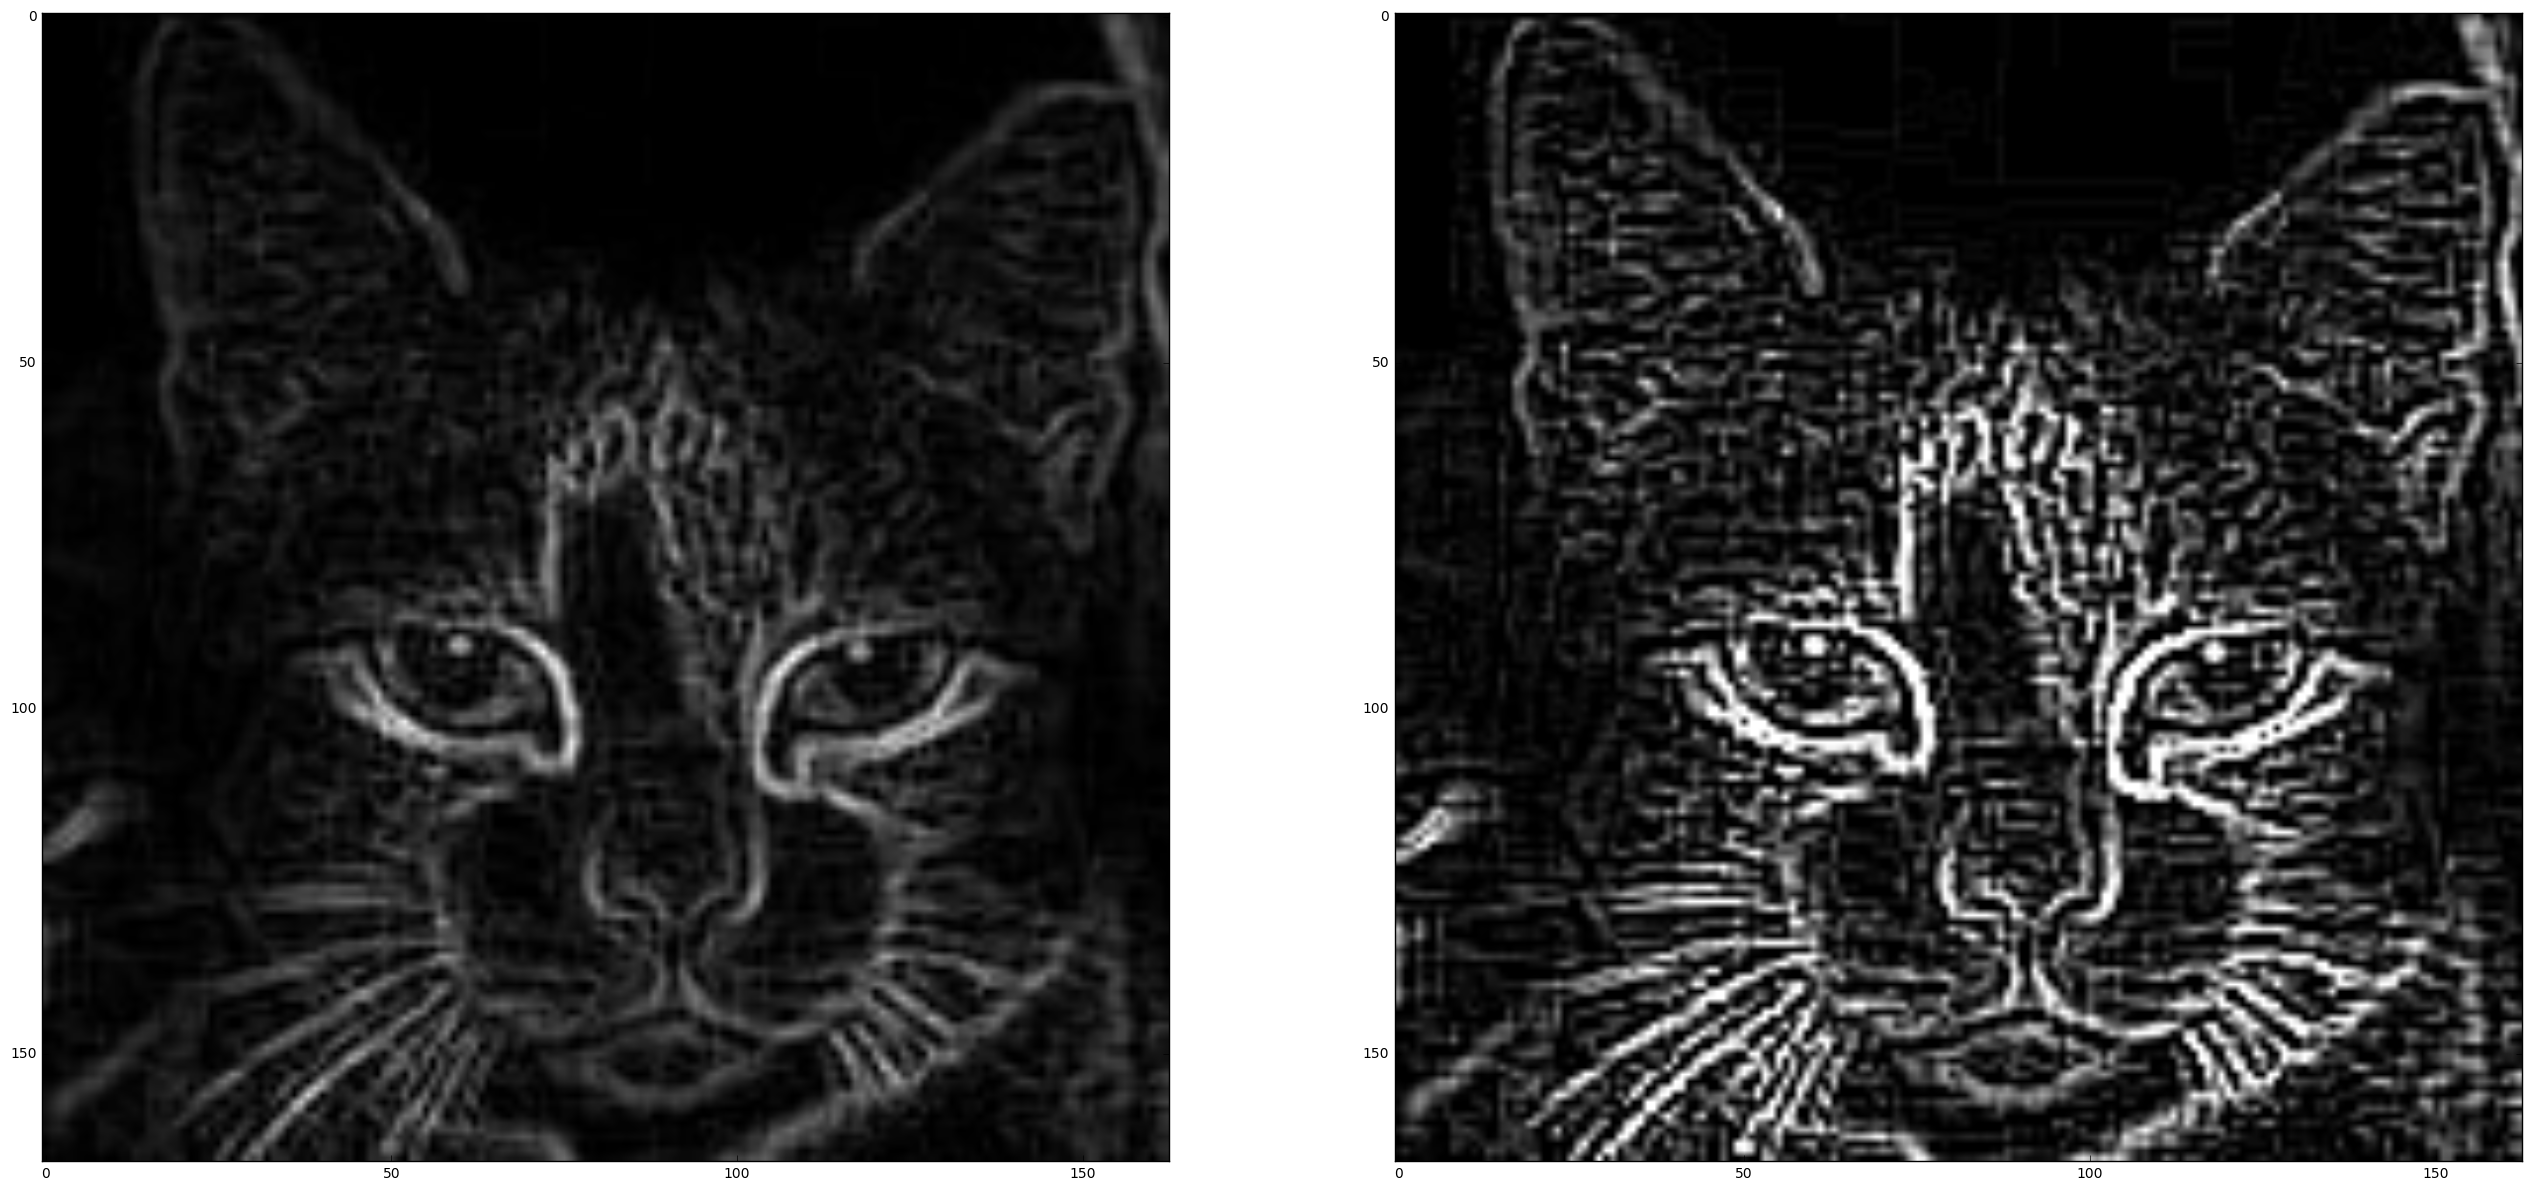

In [5]:
kernal = np.array([[-1,-1,-1],[1,9,-1],[-1,-1,-1]])
thres = cv2.filter2D(subimg,cv2.CV_8U,kernal)
#thres  = convol(subimg,kernal,3,0)
#ret, thres = cv2.threshold(subimg,40,255,cv2.THRESH_BINARY)
fig, axs = subplots(1, 2, figsize=(32, 32))
axs[0].imshow(subimg)
axs[0].axis('on')
axs[1].imshow(thres)
axs[1].axis('on')
gray()
show()

In [2]:
def get_car_number(name):
    car1 =  cv2.imread(name)
    print(car1.shape[0],car1.shape[1])
    left = car1.shape[1]
    top = car1.shape[0]
    bottom = 0
    right = 0
    for i in range(int(car1.shape[0]/5),int(car1.shape[0]/5*4)):
        for j in range(int(car1.shape[1]/5),int(car1.shape[1]/5*4)):
            if car1[i,j,1]/2*3 > car1[i,j,0]*2 and car1[i,j,1]/2*3 > car1[i,j,2]*2 :
                if left > j:
                    left = j
                if right < j :
                    right = j
                if top > i :
                    top = i;
                if bottom < i :
                    bottom = i            

    print(left, top, bottom, right)

    crop = np.zeros((bottom-top,right-left,3), 'uint8')
    for i in range(0,crop.shape[0]):
        for j in range(0,crop.shape[1]):
            if car1[i+top,j+left,1]/2*3 > car1[i+top,j+left,0]*2 and car1[i+top,j+left,1]/2*3 > car1[i+top,j+left,2]*2 :
                crop[i,j,0] = 255
                crop[i,j,1] = 255
                crop[i,j,2] = 255
            else :
                crop[i,j,0] = 0
                crop[i,j,1] = 0
                crop[i,j,2] = 0
    
    return crop
      
def gray_crop(image):
    kernel = np.ones((3,3),np.uint8)
    erodes = cv2.erode(image,kernel,iterations = 10)
    left = image.shape[0]
    top = image.shape[1]
    bottom = 0
    right = 0
    for i in range(0,int(erodes.shape[0])):
        for j in range(0,int(erodes.shape[1])):
            if erodes[i,j,0] == 255 :
                if left > j:
                    left = j
                if right < j :
                    right = j
                if top > i :
                    top = i;
                if bottom < i :
                    bottom = i            

    print(left, top, bottom, right)
    top = top-20
    left = left-20
    if left < 0 :
        left = 0
    
    if top < 0 :
        top = 0
    
    crop = np.zeros((bottom-top,right-left,3), 'uint8')
    for i in range(0,crop.shape[1]):
        for j in range(0,crop.shape[0]):
            if image[j+top,i+left,0] > 0 :
                crop[j,i,0] = 255
                crop[j,i,1] = 255
                crop[j,i,2] = 255
            else :
                crop[j,i,0] = 0
                crop[j,i,1] = 0
                crop[j,i,2] = 0
                
    return crop

In [174]:
car1 =  "image/car1.jpg"
crop1 = get_car_number(car1) 

car2 =  "image/car2.jpg"
crop2 = get_car_number(car2) 

car3 =  "image/car3.jpg"
crop3 = get_car_number(car3) 

2048 1536
423 680 1035 1121
1536 2048
529 307 1095 1637
1536 2048
495 538 1227 1623


In [175]:
print(crop1.shape)
print(crop2.shape)
print(crop3.shape)

(355, 698, 3)
(788, 1108, 3)
(689, 1128, 3)


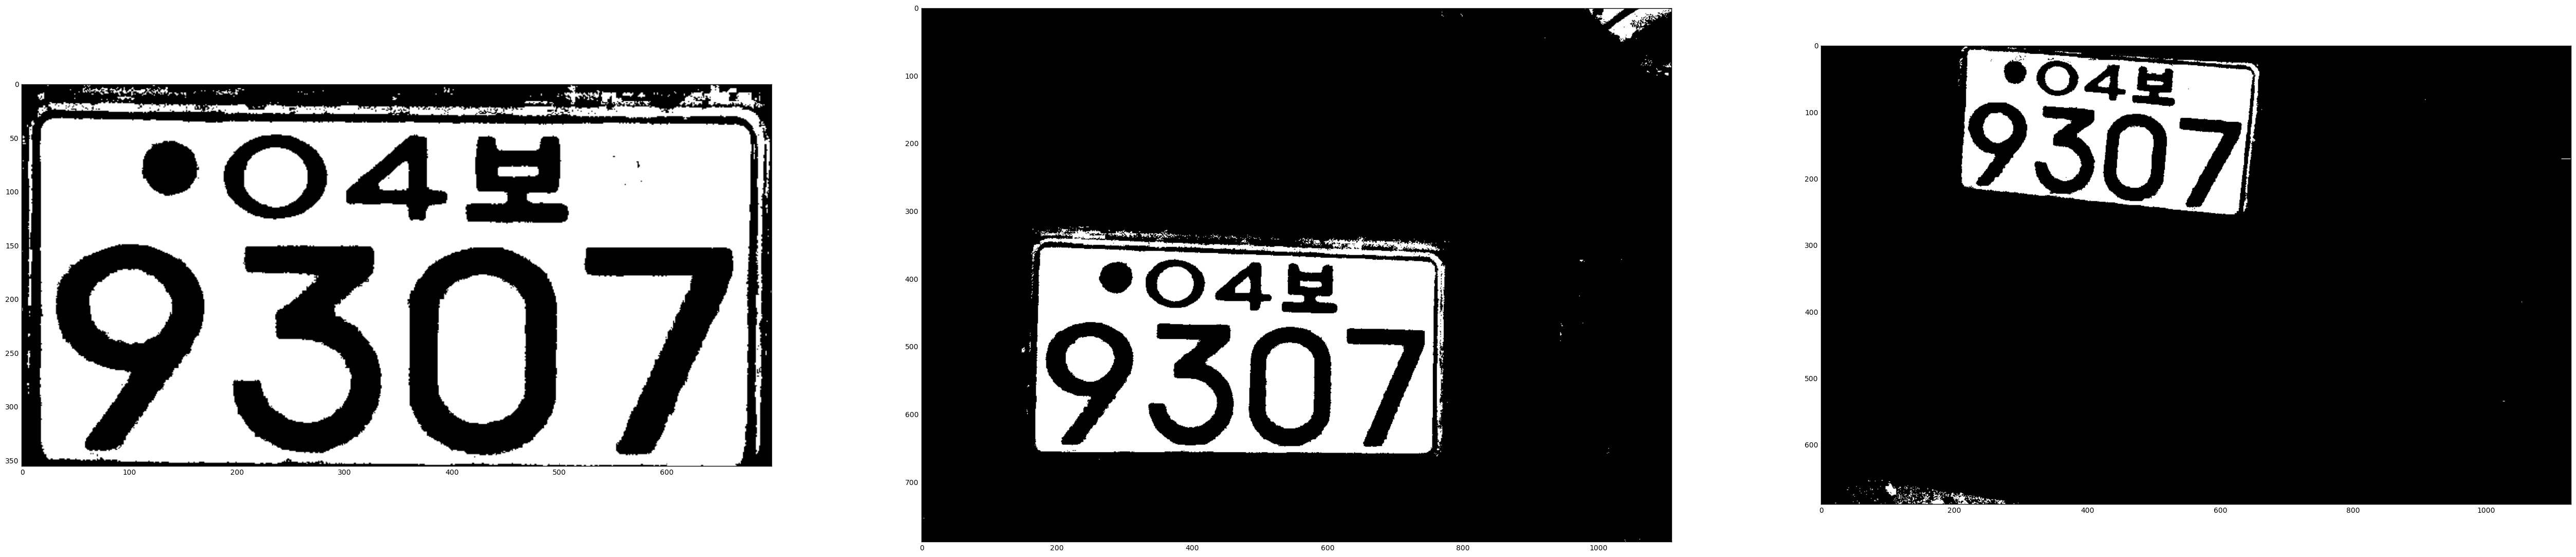

In [9]:
fig, axs = subplots(1, 3, figsize=(64, 64))
axs[0].imshow(crop1)
axs[0].axis('on')
axs[1].imshow(crop2)
axs[1].axis('on')
axs[2].imshow(crop3)
axs[2].axis('on')
gray()
show()

In [176]:
crop1_1 = gray_crop(crop1) 
crop2_1 = gray_crop(crop2) 
crop3_1 = gray_crop(crop3) 
print(crop1_1.shape)
print(crop2_1.shape)
print(crop3_1.shape)

28 42 354 667
178 364 647 747
222 17 242 636
(332, 659, 3)
(303, 589, 3)
(242, 434, 3)


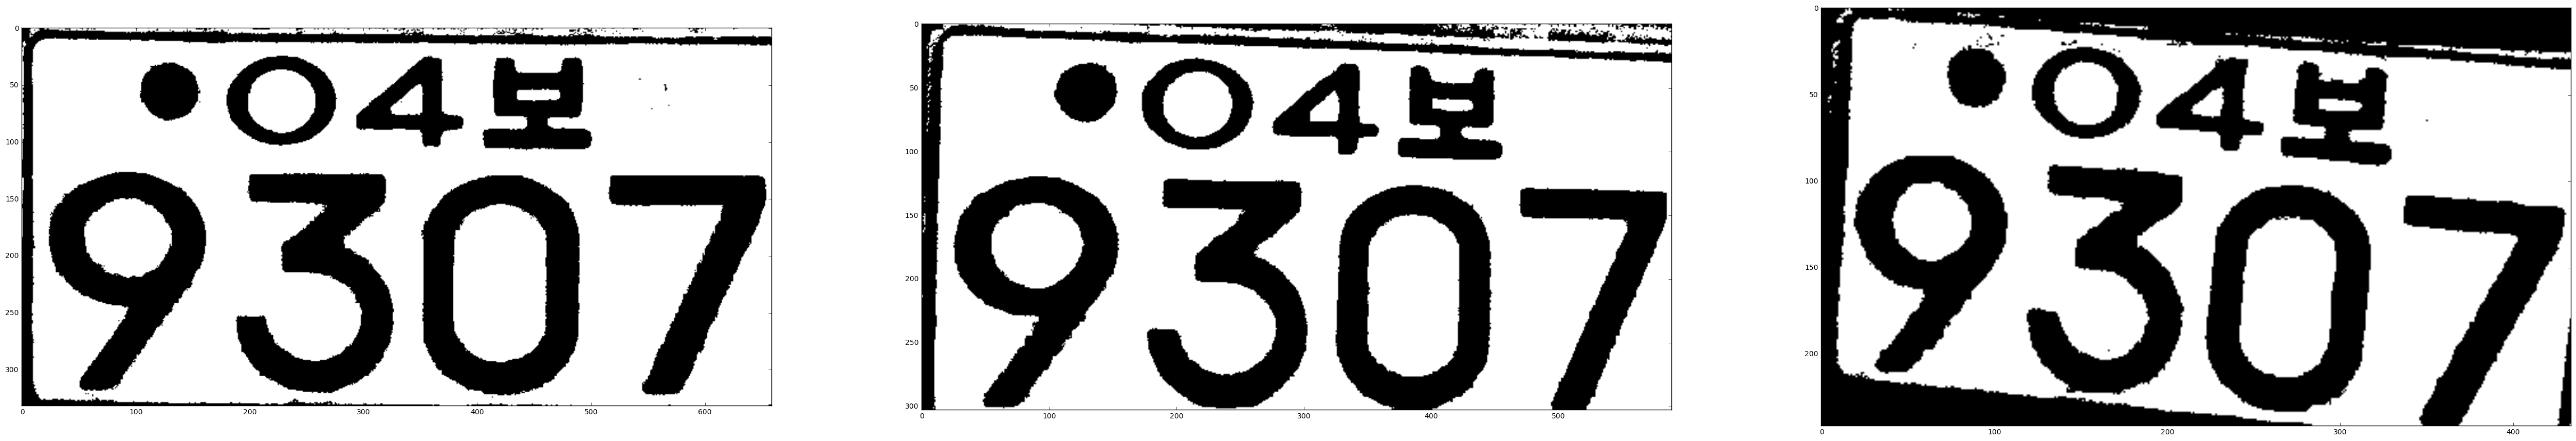

In [11]:
fig, axs = subplots(1, 3, figsize=(64, 64))
axs[0].imshow(crop1_1)
axs[0].axis('on')
axs[1].imshow(crop2_1)
axs[1].axis('on')
axs[2].imshow(crop3_1)
axs[2].axis('on')
gray()
show()

In [134]:
car4 =  "image/car4.jpg"
crop4 = gray_crop(get_car_number(car4)) 
car5 =  "image/car5.jpg"
crop5 = gray_crop(get_car_number(car5)) 
car6 =  "image/car6.jpg"
crop6 = gray_crop(get_car_number(car6)) 
car7 =  "image/car7.jpg"
crop7 = gray_crop(get_car_number(car7)) 
car8 =  "image/car8.jpg"
crop8 = gray_crop(get_car_number(car8))

1536 2048
412 533 955 1637
422 35 284 995
2048 1536
307 409 1313 1227
20 392 672 773
2048 1536
307 409 1314 1227
0 402 683 748
2048 1536
307 414 1248 1227
135 351 691 790
1536 2048
409 307 1227 1637
81 0 919 1193


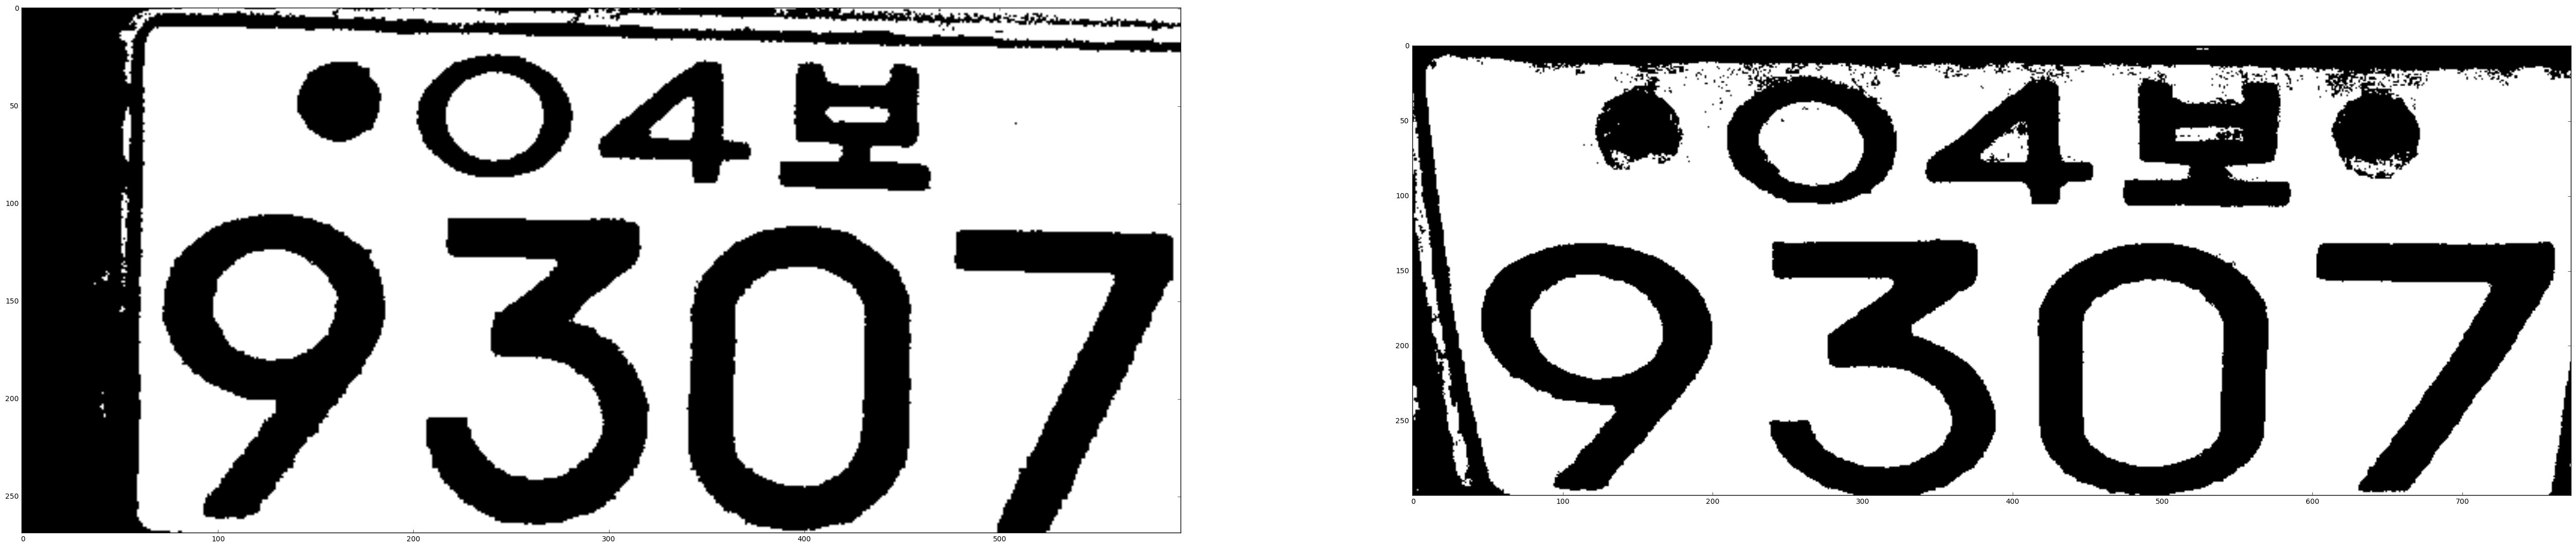

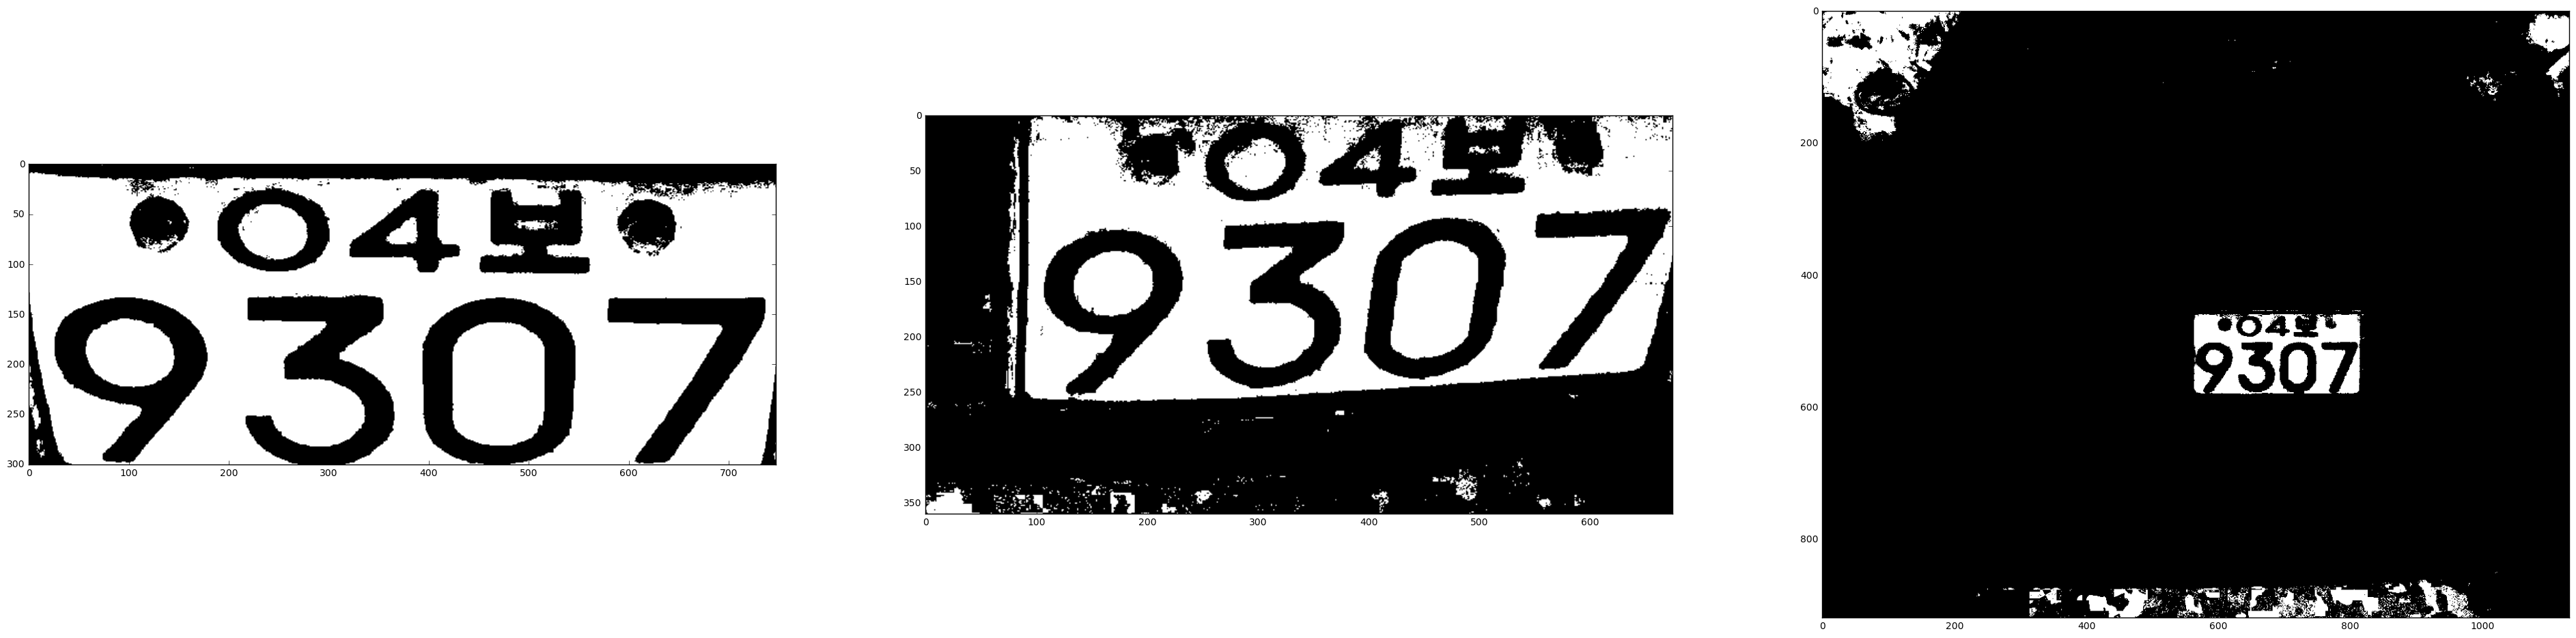

In [135]:
fig, axs = subplots(1, 2, figsize=(64, 64))
axs[0].imshow(crop4)
axs[0].axis('on')
axs[1].imshow(crop5)
axs[1].axis('on')
gray()
show()
fig, axs = subplots(1, 3, figsize=(48, 48))
axs[0].imshow(crop6)
axs[0].axis('on')
axs[1].imshow(crop7)
axs[1].axis('on')
axs[2].imshow(crop8)
axs[2].axis('on')
gray()
show()

In [126]:
import tensorflow as tf
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
# tensorflow graph input
X = tf.placeholder('float', [None,784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W = tf.Variable(tf.random_uniform([784, 10], -1.0 , 1.0),name='W')
b = tf.Variable(tf.zeros([10]),name='b')

# Our hypothesis
activation = tf.add(tf.matmul(X, W),b)  # Softmax

# Cost function: cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = activation, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  # Gradient Descen

saver = tf.train.Saver()


Extracting ./MNIST_DATA\train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\t10k-labels-idx1-ubyte.gz


In [181]:
def mnist_crop(image):
    number = np.zeros((4,int(image.shape[0]/3*2),int(image.shape[1]/4)),'uint8')
    number_r = np.zeros((4,28,28),'uint8')
    number_mnist = np.zeros((4,784))
    number_r2 = np.zeros((4,28,28),'uint8')
    
    print("number : ",number.shape)
    for num in range(4):           
        for i in range(0,number[num].shape[0]):
            for j in range(0,number[num].shape[1]):
                if image[i+int(image.shape[0]/3),j+int((image.shape[1]/4)*num),0] == 0 :
                    number[num,i,j] = 255
    
        #number_r = cv2.createmat(28, 28, cv.CV_8UC1)
        #number_r = np.zeros((28,28),'uint8')
        number_r[num] = cv2.resize(number[num],(28,28))
        for i in range(0,28):
            for j in range(0,28):
                if number_r[num,j,i] > 0 :
                    number_r[num,j,i] = 255
                    
        kernel = np.ones((3,3),np.uint8)
        number_r2[num] = cv2.erode(number_r[num],kernel,2)
        
        for i in range(0,28):
            for j in range(0,28):
                if number_r2[num,j,i] == 255 :
                    number_mnist[num,i*28+j] = 255
    
    return number, number_r2, number_mnist

answer = np.zeros((4,10))
answer[0][9] = 1
answer[1][3] = 1
answer[2][0] = 1
answer[3][7] = 1
    
res1, res1_mini, number1_mnist = mnist_crop(crop1_1)
res2, res2_mini, number2_mnist = mnist_crop(crop2_1)
res3, res3_mini, number3_mnist = mnist_crop(crop3_1)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    import re
    ckpt = tf.train.get_checkpoint_state("train")
    print(ckpt)
    if ckpt and ckpt.model_checkpoint_path:        
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        saver.restore(sess, os.path.join("train", ckpt_name))
        counter = int(next(re.finditer("(\d+)(?!.*\d)",ckpt_name)).group(0))
        print(" [*] Success to read {}".format(ckpt_name))
    else:
        print(" [*] Failed to find a checkpoint")   
        
    res1_ = sess.run(activation, feed_dict={X:number1_mnist} ) 
    res2_ = sess.run(activation, feed_dict={X:number2_mnist} ) 
    res3_ = sess.run(activation, feed_dict={X:number3_mnist} ) 

"""
with tf.Session() as sess:    
    init = tf.global_variables_initializer()
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
            
        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                
            # Fit training using batch data
            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})
            sess.run(optimizer, feed_dict={X: number1_mnist, Y: answer})
            sess.run(optimizer, feed_dict={X: number2_mnist, Y: answer})
            sess.run(optimizer, feed_dict={X: number3_mnist, Y: answer})
                
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch            
            avg_cost += sess.run(cost, feed_dict={X: number1_mnist, Y: answer})/total_batch
            avg_cost += sess.run(cost, feed_dict={X: number2_mnist, Y: answer})/total_batch
            avg_cost += sess.run(cost, feed_dict={X: number3_mnist, Y: answer})/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
                print("Epoch:", '%04d' %(epoch+1), "cost=", "{:.9f}".format(avg_cost))
    
        model_name = "model"
        checkpoint_dir = "train"
        
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    saver.save(sess,os.path.join(checkpoint_dir, model_name), global_step=1)
    W_ = W.eval(sess)
    b_ = b.eval(sess)
    
    res1_ = sess.run(activation, feed_dict={X:number1_mnist} ) 
    res2_ = sess.run(activation, feed_dict={X:number2_mnist} ) 
    res3_ = sess.run(activation, feed_dict={X:number3_mnist} ) 
    
    print ("Accuracy:", accuracy.eval({X: number1_mnist, Y: answer}))
    
    sess.close()
"""

number :  (4, 221, 164)
number :  (4, 202, 147)
number :  (4, 161, 108)
model_checkpoint_path: "train\\model-1"
all_model_checkpoint_paths: "train\\model-1"

 [*] Success to read model-1


'\nwith tf.Session() as sess:    \n    init = tf.global_variables_initializer()\n    sess.run(init)\n    # Training cycle\n    for epoch in range(training_epochs):\n        avg_cost = 0.\n        total_batch = int(mnist.train.num_examples/batch_size)\n            \n        # Fit the line.\n        for step in range(total_batch):\n            batch_xs, batch_ys = mnist.train.next_batch(batch_size)\n                \n            # Fit training using batch data\n            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})\n            sess.run(optimizer, feed_dict={X: number1_mnist, Y: answer})\n            sess.run(optimizer, feed_dict={X: number2_mnist, Y: answer})\n            sess.run(optimizer, feed_dict={X: number3_mnist, Y: answer})\n                \n            # Compute average loss\n            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch            \n            avg_cost += sess.run(cost, feed_dict={X: number1_mnist, Y: answer})/total_b

car1 :
9
3
0
7
car2 :
9
3
0
7
car3 :
9
3
0
7


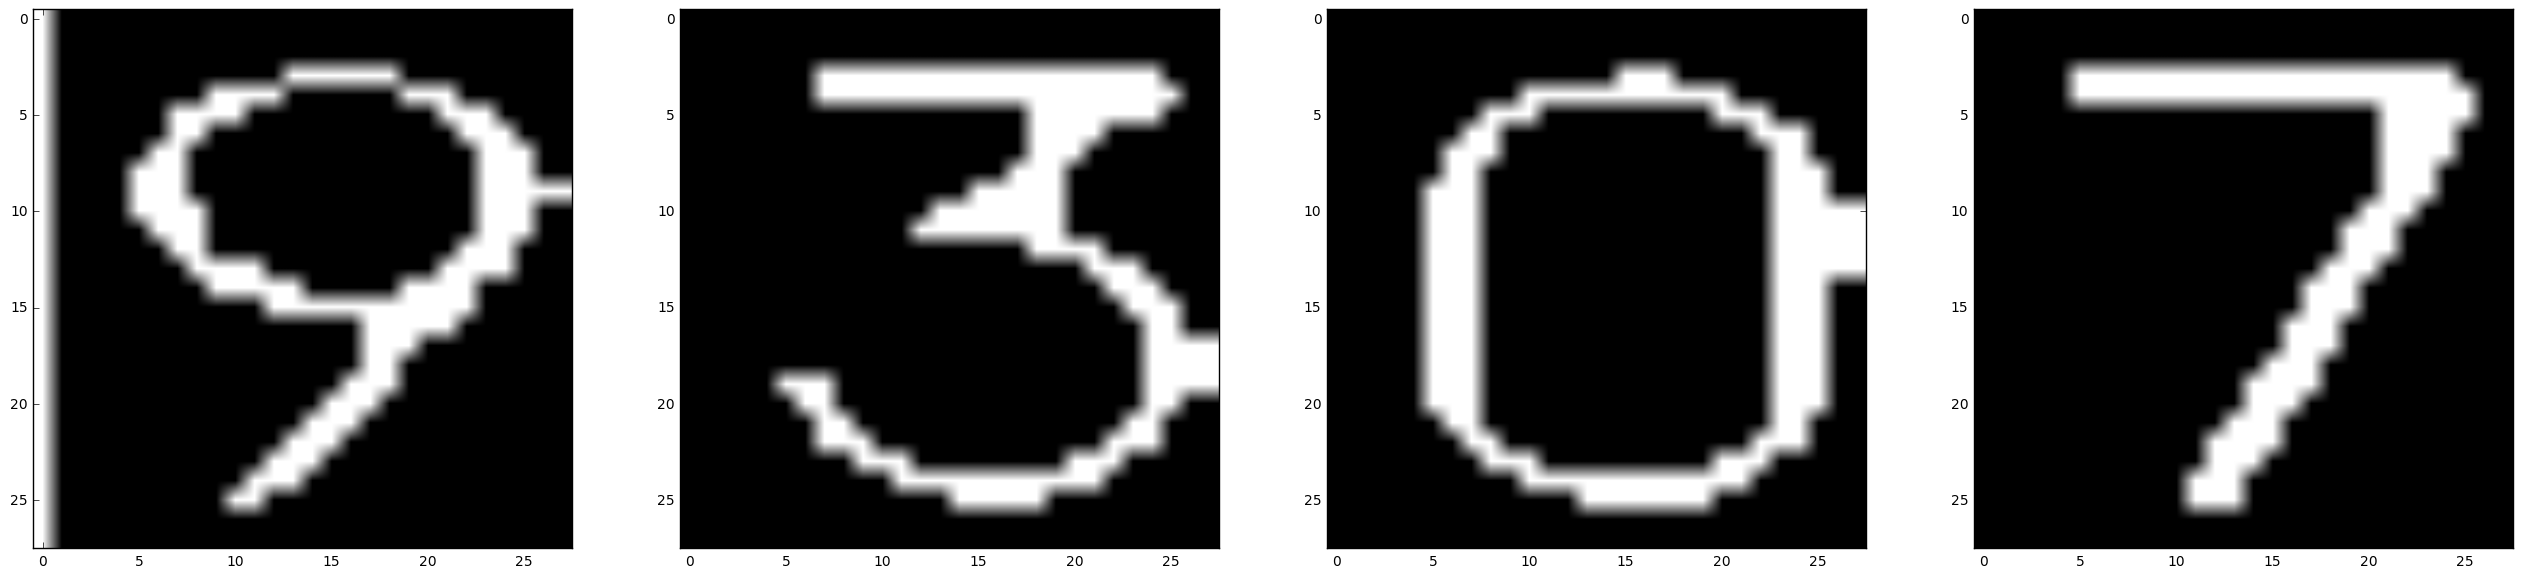

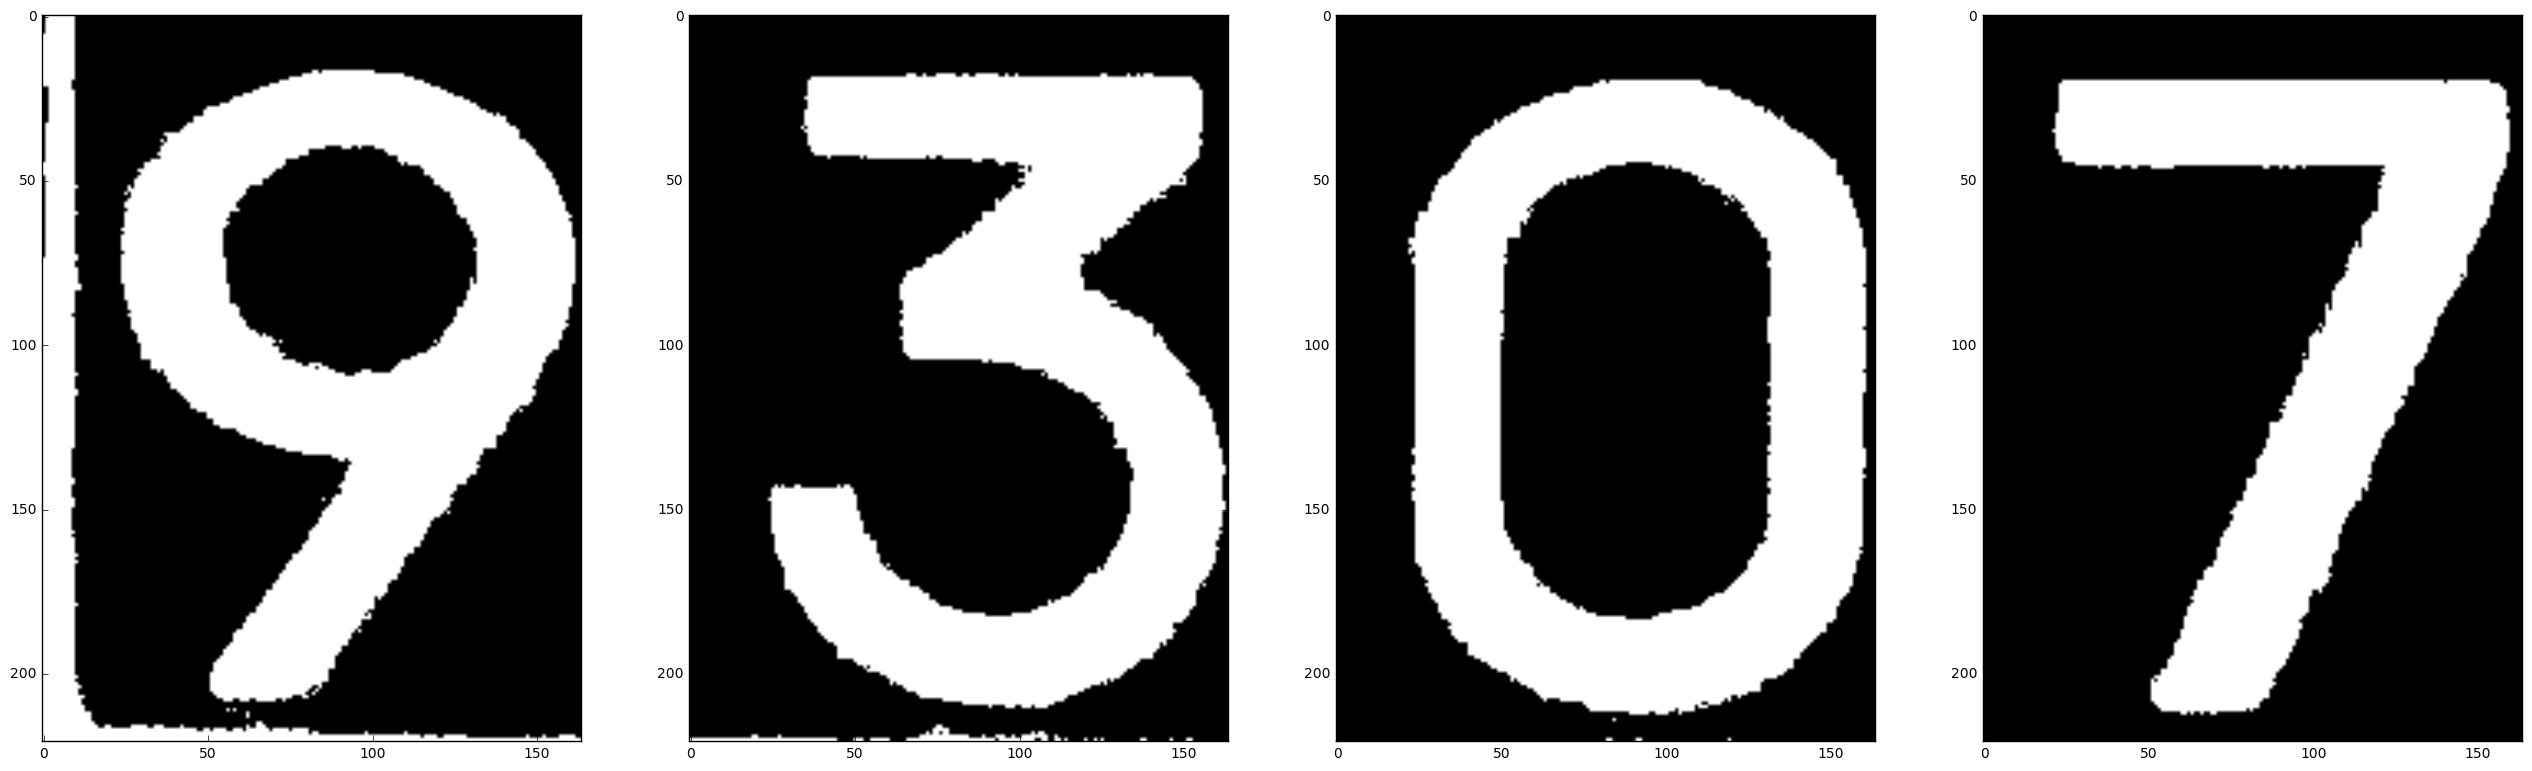

In [182]:
def findnum(array):
     maxn = max(array)
                
     maxnumb = 0
     for epoch in array:
         if epoch == maxn:
             break;
     
         maxnumb+=1
        
     return maxnumb

print("car1 :")
for i in res1_:
     print(findnum(i))

print("car2 :")
for i in res2_:
     print(findnum(i))
        
print("car3 :")
for i in res3_:
     print(findnum(i))

fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(res1_mini[0])
axs[0].axis('on')
axs[1].imshow(res1_mini[1])
axs[1].axis('on')
axs[2].imshow(res1_mini[2])
axs[2].axis('on')
axs[3].imshow(res1_mini[3])
axs[3].axis('on')
gray()
show()

fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(res1[0])
axs[0].axis('on')
axs[1].imshow(res1[1])
axs[1].axis('on')
axs[2].imshow(res1[2])
axs[2].axis('on')
axs[3].imshow(res1[3])
axs[3].axis('on')
gray()
show()

In [206]:
def get_mara_number(name,top, bottom, left, right):
    img =  cv2.imread(name,0)
    crop = np.zeros((bottom-top,right-left), 'uint8')
    print(crop.shape)
    for i in range(0,crop.shape[0]):
        for j in range(0,crop.shape[1]):
            if img[i+top,j+left] < 150 :
                crop[i,j] = 255
    
    return crop

(116, 324)
(47, 145)
(105, 278)


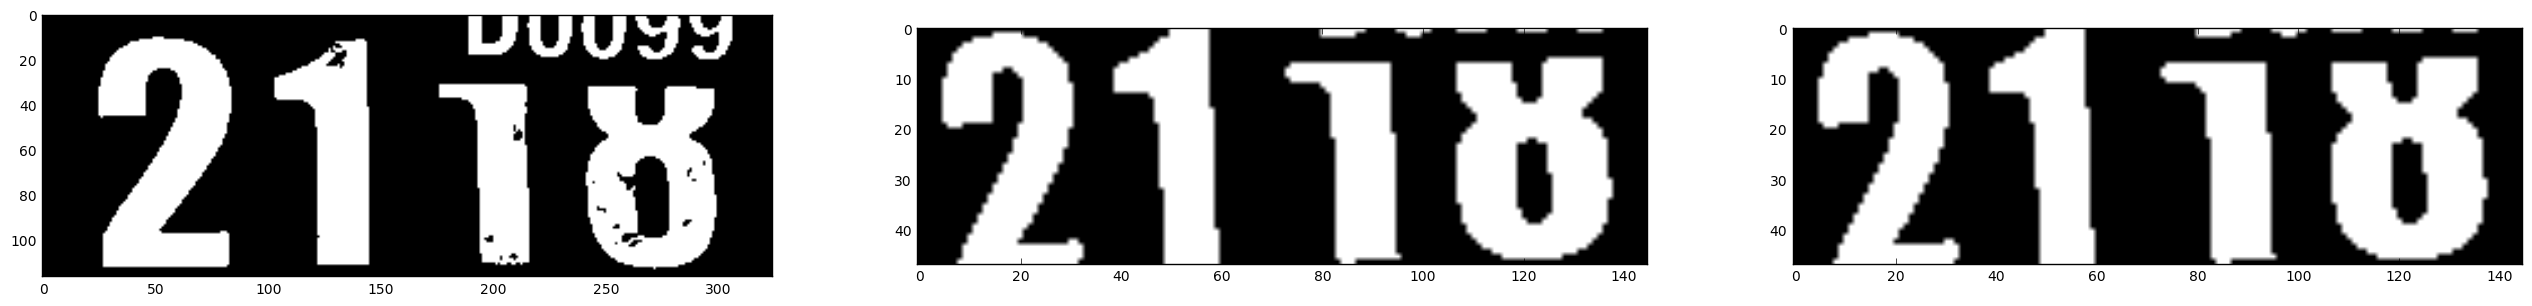

In [208]:
mara1 =  "image/mara-1.jpg"
m_crop1 = get_mara_number(mara1,1438,1554,1089,1413)

mara2 =  "image/mara-2.jpg"
m_crop2 = get_mara_number(mara2,898,945,607,752)

mara3 =  "image/mara-3.jpg"
m_crop3 = get_mara_number(mara3,1580,1685,1122,1400)

fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(m_crop1)
axs[0].axis('on')
axs[1].imshow(m_crop2)
axs[1].axis('on')
axs[2].imshow(m_crop2)
axs[2].axis('on')
gray()
show()

In [211]:
def mnist_crop2(image):
    number = np.zeros((4,int(image.shape[0]),int(image.shape[1]/4)),'uint8')
    number_r = np.zeros((4,28,28),'uint8')
    number_mnist = np.zeros((4,784))
    number_r2 = np.zeros((4,28,28),'uint8')
    
    print("number : ",number.shape)
    for num in range(4):           
        for i in range(0,number[num].shape[0]):
            for j in range(0,number[num].shape[1]):
                if image[i,j+int((image.shape[1]/4)*num)] == 0 :
                    number[num,i,j] = 255
    
        #number_r = cv2.createmat(28, 28, cv.CV_8UC1)
        #number_r = np.zeros((28,28),'uint8')
        number_r[num] = cv2.resize(number[num],(28,28))
        for i in range(0,28):
            for j in range(0,28):
                if number_r[num,j,i] > 0 :
                    number_r[num,j,i] = 255
                    
        kernel = np.ones((3,3),np.uint8)
        number_r2[num] = cv2.erode(number_r[num],kernel,2)
        
        for i in range(0,28):
            for j in range(0,28):
                if number_r2[num,j,i] == 255 :
                    number_mnist[num,i*28+j] = 255
    
    return number, number_r2, number_mnist

In [212]:
answer = np.zeros((4,10))
answer[0,2] = 1
answer[1,1] = 1
answer[2,1] = 1
answer[3,8] = 1
    
mara_res1, mara1_mini, mara1_mnist = mnist_crop2(m_crop1)
mara_res2, mara2_mini, mara2_mnist = mnist_crop2(m_crop2)
mara_res3, mara3_mini, mara3_mnist = mnist_crop2(m_crop3)

number :  (4, 116, 81)
number :  (4, 47, 36)
number :  (4, 105, 69)


In [215]:
with tf.Session() as sess:    
    init = tf.global_variables_initializer()
    sess.run(init)
    # Training cycle
    for epoch in range(1000):
        avg_cost = 0.
        sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})
        sess.run(optimizer, feed_dict={X: mara1_mnist, Y: answer})
        sess.run(optimizer, feed_dict={X: mara2_mnist, Y: answer})
        sess.run(optimizer, feed_dict={X: mara3_mnist, Y: answer})
                
        # Compute average loss
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/4            
        avg_cost += sess.run(cost, feed_dict={X: mara1_mnist, Y: answer})/4
        avg_cost += sess.run(cost, feed_dict={X: mara2_mnist, Y: answer})/4
        avg_cost += sess.run(cost, feed_dict={X: mara3_mnist, Y: answer})/4
        # Display logs per epoch step
        if epoch % 100 == 0:
                print("Epoch:", '%04d' %(epoch+1), "cost=", "{:.9f}".format(avg_cost))
    mara_res1_ = sess.run(activation, feed_dict={X:mara1_mnist} ) 
    res2_ = sess.run(activation, feed_dict={X:mara2_mnist} ) 
    res3_ = sess.run(activation, feed_dict={X:mara3_mnist} ) 

Epoch: 0001 cost= 1410.200222373
Epoch: 0101 cost= 0.052916989
Epoch: 0201 cost= 0.012922867
Epoch: 0301 cost= 0.004785909
Epoch: 0401 cost= 0.002529243
Epoch: 0501 cost= 0.001570186
Epoch: 0601 cost= 0.001063814
Epoch: 0701 cost= 0.000760622
Epoch: 0801 cost= 0.000563675
Epoch: 0901 cost= 0.000428297


In [ ]:
print("car1 :")
for i in res1_:
     print(findnum(i))

print("car2 :")
for i in res2_:
     print(findnum(i))
        
print("car3 :")
for i in res3_:
     print(findnum(i))